<a href="https://colab.research.google.com/github/ayush-shinde/data-science-projects/blob/main/ML_MINOR_MAY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**MINOR PROJECT** (Diabetes dataset)


PROBLEM SET: The given dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

### <font color = orange> Importing the required libraries

In [ ]:
import pandas as pd             # data mnipulation 
import numpy as np              # number manipulation/crunching
import matplotlib.pyplot as plt # plotting
# Classification report
from sklearn.metrics import classification_report 
# Train Test split
from sklearn.model_selection import train_test_split
# Confusion Matrix
from sklearn.metrics import confusion_matrix
# Model Accuracy
from sklearn.metrics import accuracy_score

### <font color = orange> Dataset preview

In [ ]:
diab = pd.read_csv("diabetes.csv")
diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### <font color = orange> Checking the Correlation of "outcome" with the other features

In [ ]:
diab.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [ ]:
diab.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**(Since 'BloodPressure' &  'SkinThickness' has very less correleation with the outcome, we can neglect both of them)**

### <font color = orange> Features 

In [ ]:
X= diab[['Pregnancies','Glucose','Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].values 
X

array([[  6.   , 148.   ,   0.   ,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,   0.   ,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,   0.   ,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   , 112.   ,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,   0.   ,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,   0.   ,  30.4  ,   0.315,  23.   ]])

### <font color = orange> Label


In [ ]:
y= diab[['Outcome']].values
y

array([[1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
    

### <font color = orange> Splitting the data into train and test

In [ ]:
# Split the data into train and test data:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
X_train

array([[7.00e+00, 1.50e+02, 1.26e+02, 3.52e+01, 6.92e-01, 5.40e+01],
       [4.00e+00, 9.70e+01, 0.00e+00, 2.82e+01, 4.43e-01, 2.20e+01],
       [0.00e+00, 1.65e+02, 6.80e+02, 5.23e+01, 4.27e-01, 2.30e+01],
       ...,
       [4.00e+00, 9.40e+01, 0.00e+00, 2.47e+01, 1.48e-01, 2.10e+01],
       [1.10e+01, 8.50e+01, 0.00e+00, 3.01e+01, 3.00e-01, 3.50e+01],
       [5.00e+00, 1.36e+02, 0.00e+00, 0.00e+00, 6.40e-01, 6.90e+01]])

### <font color = orange> Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
X_test

array([[-8.92954322e-01,  2.39507259e+00, -6.69261578e-01,
         1.52657475e+00,  2.78935129e+00, -9.30642826e-01],
       [-5.65537738e-01, -4.25892449e-01,  2.80308009e-01,
         3.19441160e-01, -2.76988247e-01, -8.35980346e-01],
       [ 8.92954322e-02, -1.37643502e+00, -6.69261578e-01,
         3.71360884e-01, -3.17253311e-01, -6.46655385e-01],
       [ 4.16712017e-01,  1.38320470e+00,  9.92485199e-01,
        -6.92993461e-01,  2.89819971e-01,  1.81456910e+00],
       [-1.22037091e+00, -3.03241795e-01, -6.69261578e-01,
        -8.48752633e-01,  5.15923795e-01, -7.86805031e-02],
       [-8.92954322e-01, -1.22312170e+00, -2.89433743e-01,
        -5.89154013e-01, -6.51763079e-01, -7.41317865e-01],
       [ 1.72637836e+00,  9.53927407e-01,  9.54502416e-01,
         3.97320746e-01,  1.23759765e+00,  1.10644458e-01],
       [-2.38121153e-01,  1.68983133e+00,  8.12066978e-01,
         2.80501367e-01,  2.04599625e+00,  1.90923158e+00],
       [-5.65537738e-01,  1.87360820e-01,  1.942

### <font color = orange> Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [ ]:
y_test

array([[1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

### <font color = orange> Accuracy of the Model




In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8246753246753247

82.46 % accuracy


### <font color = orange> Feature Importance Plot


Text(0.5, 0, 'Relative Importance')

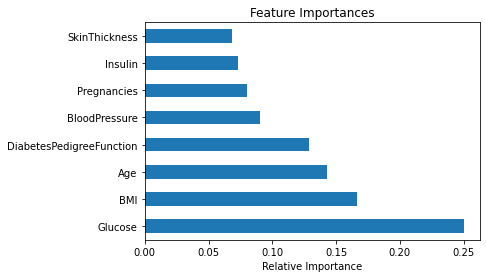

In [ ]:
feat_importances = pd.Series(model.feature_importances_, index = X_featurenames)
feat_importances.nlargest(8).plot(kind = 'barh')

#table features
plt.title('Feature Importances')
plt.xlabel('Relative Importance')


### <font color = orange> Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test,y_pred)

array([[96, 11],
       [16, 31]])

### <font color = orange> CONCLUSION

**FROM THE ABOVE RESULTS IT CAN BE CONCLUDED THAT THE MODEL WORKS SUCCESSFULLY WITH AN ACCURACY OF 82.46%** <BR>
**ALSO, IT CAN BE OBSERVED THAT GLUCOSE VARIABLE HAS THE HIGHEST INFLUENCE IN THE MODEL, FOLLOWED BY INSULIN**